# Examining non-landed private property in Singapore

### List of postal districts

Postal district: 01	
Postal sector: 01, 02, 03, 04, 05, 06
General location: Raffles Place, Cecil, Marina, People's Park

Postal district: 02	
Postal sector: 07, 08
General location:Anson, Tanjong Pagar

Postal district: 03	
Postal sector: 14, 15, 16
General location:Queenstown, Tiong Bahru

Postal district: 04	
Postal sector: 09, 10
General location:Telok Blangah, Harbourfront

Postal district: 05	
Postal sector: 11, 12, 13
General location: Pasir Panjang, Hong Leong Garden, Clementi New Town

Postal district: 06	
Postal sector: 17
General location: High Street, Beach Road (part)

Postal district: 07	
Postal sector: 18, 19
General location: Middle Road, Golden Mile

Postal district: 08	
Postal sector: 20, 21
General location:Little India

Postal district: 09	
Postal sector: 22, 23
General location: Orchard, Cairnhill, River Valley

Postal district: 10	
Postal sector: 24, 25, 26, 27
Ardmore, Bukit Timah, Holland Road, Tanglin

Postal district: 11	
Postal sector: 28, 29, 30
General location: Watten Estate, Novena, Thomson

Postal district: 12	
Postal sector: 31, 32, 33
General location: Balestier, Toa Payoh, Serangoon

Postal district: 13	
Postal sector: 34, 35, 36, 37
General location:Macpherson, Braddell

Postal district: 14	
Postal sector: 38, 39, 40, 41
General location: Geylang, Eunos

Postal district: 15	
Postal sector: 42, 43, 44, 45
General location: Katong, Joo Chiat, Amber Road

Postal district: 16	
Postal sector: 46, 47, 48
General location: Bedok, Upper East Coast, Eastwood, Kew Drive

Postal district: 17	
Postal sector: 49, 50, 81
General location:Loyang, Changi

Postal district: 18	
Postal sector: 51, 52
General location: Tampines, Pasir Ris

Postal district: 19	
Postal sector: 53, 54, 55, 82
General location: Serangoon Garden, Hougang, Punggol

Postal district: 20	
Postal sector: 56, 57
General location: Bishan, Ang Mo Kio

Postal district: 21	
Postal sector: 58, 59
General location:Upper Bukit Timah, Clementi Park, Ulu Pandan

Postal district: 22	
Postal sector: 60, 61, 62, 63, 64
General location: Jurong

Postal district: Postal district: 23	
Postal sector: 65, 66, 67, 68
General location: Hillview, Dairy Farm, Bukit Panjang, Choa Chu Kang

Postal district: 24	
Postal sector: 69, 70, 71
General location: Lim Chu Kang, Tengah

Postal district: 25	
Postal sector: 72, 73
General location: Kranji, Woodgrove

Postal district: 26	
Postal sector: 77, 78
General location: Upper Thomson, Springleaf

Postal district: 27	
Postal sector: 75, 76
General location: Yishun, Sembawang

Postal district: 28	
Postal sector: 79, 80
General location: Seletar

### Market segment 
Market segment is grouped by Core Central Region (CCR), Rest of Central Region (RCR) and Outside Central Regon (OCR). CCR has postal districts of 9,10 and 11, and parts of 1,2,4,6, and 7. RCR has postal districts of 1,2,4,5,6,7,13,14,15 and 20. OCR has postal districts of 16 to 19, 21 to 28, and parts of 5,14,15 and 20.

Every districts is present in data except 1,2,7 and 21 to 26.

https://www.ura.gov.sg/realEstateIIWeb/resources/misc/list_of_postal_districts.htm

## 1. Data cleaning and wrangling

In [1]:
from platform import python_version

In [2]:
python_version()

'3.9.12'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import gmaps
import requests
import folium

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

from scipy import stats
from bs4 import BeautifulSoup

%matplotlib inline

In [216]:
# 6 different dataset were imported and compiled into housing
housing = pd.read_csv('../projects/housing.csv')

In [218]:
housing.head()

,project_name,street_name,type,postal_district,market_segment,tenure,price,area_sqft,floor_level,price_per_sqft,date_of_sale
0,RIVIERE,JIAK KIM STREET,Apartment,3.0,RCR,99 yrs lease commencing from 2018,2468000.0,818.0,31 to 35,3017.0,Nov-2022
1,THE LANDMARK,CHIN SWEE ROAD,Condominium,3.0,RCR,99 yrs lease commencing from 2020,2759888.0,1141.0,11 to 15,2419.0,Nov-2022
2,THE LANDMARK,CHIN SWEE ROAD,Condominium,3.0,RCR,99 yrs lease commencing from 2020,1354888.0,517.0,21 to 25,2622.0,Nov-2022
3,THE LANDMARK,CHIN SWEE ROAD,Condominium,3.0,RCR,99 yrs lease commencing from 2020,2778888.0,1141.0,16 to 20,2436.0,Nov-2022
4,THE LANDMARK,CHIN SWEE ROAD,Condominium,3.0,RCR,99 yrs lease commencing from 2020,2888640.0,1141.0,16 to 20,2532.0,Nov-2022


In [219]:
housing.tail()

,project_name,street_name,type,postal_district,market_segment,tenure,price,area_sqft,floor_level,price_per_sqft,date_of_sale
43945,PARC BOTANNIA,FERNVALE STREET,Condominium,28.0,OCR,99 yrs lease commencing from 2016,879000.0,667.0,16 to 20,1317.0,Nov-2017
43946,PARC BOTANNIA,FERNVALE STREET,Condominium,28.0,OCR,99 yrs lease commencing from 2016,652000.0,506.0,11 to 15,1289.0,Nov-2017
43947,PARC BOTANNIA,FERNVALE STREET,Condominium,28.0,OCR,99 yrs lease commencing from 2016,1535000.0,1281.0,06 to 10,1198.0,Nov-2017
43948,PARC BOTANNIA,FERNVALE STREET,Condominium,28.0,OCR,99 yrs lease commencing from 2016,655000.0,506.0,11 to 15,1295.0,Nov-2017
43949,PARC BOTANNIA,FERNVALE STREET,Condominium,28.0,OCR,99 yrs lease commencing from 2016,853000.0,667.0,01 to 05,1278.0,Nov-2017


In [50]:
housing.shape

(43950, 11)

In [51]:
housing.isnull().sum()

project_name       0
street_name        0
type               0
postal_district    0
market_segment     0
tenure             0
price              0
area_sqft          0
floor_level        0
price_per_sqft     0
date_of_sale       0
dtype: int64

In [52]:
housing['type'].value_counts()

Apartment      30864
Condominium    13086
Name: type, dtype: int64

In [53]:
housing_condo = housing[housing['type'] == 'Condominium']

####  Filter for only leased housing_condo

In [54]:
# filter for only leasehold tenures
housing_condo_lease = housing_condo[housing_condo['tenure'] != 'Freehold']

In [55]:
housing_condo_lease[['leasehold', 'year_built']] = housing_condo_lease['tenure'].apply(lambda x: pd.Series(str(x).split('yrs lease commencing from')))

C:\Users\katel\AppData\Local\Temp\ipykernel_28252\2110480518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_condo_lease[['leasehold', 'year_built']] = housing_condo_lease['tenure'].apply(lambda x: pd.Series(str(x).split('yrs lease commencing from')))
C:\Users\katel\AppData\Local\Temp\ipykernel_28252\2110480518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_condo_lease[['leasehold', 'year_built']] = housing_condo_lease['tenure'].apply(lambda x: pd.Series(str(x).split('yrs lease comm

In [56]:
# drop column of tenure
housing_condo_lease = housing_condo_lease.drop(columns=['tenure'])

Text(0, 0.5, 'Count')

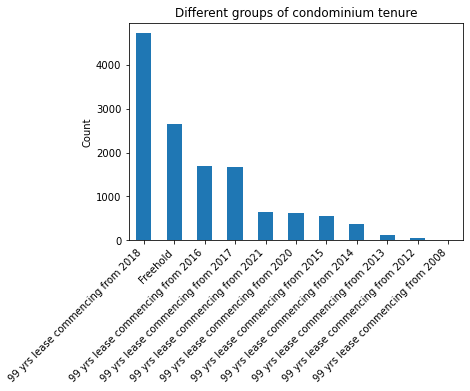

In [57]:
housing_condo['tenure'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Different groups of condominium tenure')
plt.ylabel('Count')

In [58]:
housing_condo_lease = housing_condo_lease.drop(columns = ['type', 'leasehold'])

In [59]:
housing_condo_lease.insert(0,'property_ID', range(1, 1+ len(housing_condo_lease)))

In [60]:
# change property id to string 
housing_condo_lease['property_ID'] = housing_condo_lease['property_ID'].astype(str)
housing_condo_lease['postal_district'] = housing_condo_lease['postal_district'].astype(str)

In [61]:
housing_condo_lease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10432 entries, 1 to 2027
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_ID      10432 non-null  object 
 1   project_name     10432 non-null  object 
 2   street_name      10432 non-null  object 
 3   postal_district  10432 non-null  object 
 4   market_segment   10432 non-null  object 
 5   price            10432 non-null  float64
 6   area_sqft        10432 non-null  float64
 7   floor_level      10432 non-null  object 
 8   price_per_sqft   10432 non-null  float64
 9   date_of_sale     10432 non-null  object 
 10  year_built       10432 non-null  object 
dtypes: float64(3), object(8)
memory usage: 978.0+ KB


In [62]:
housing_condo_lease.describe()

,price,area_sqft,price_per_sqft
count,1.043200e+04,10432.000000,10432.000000
mean,1.371800e+06,866.783646,1598.144651
std,6.025194e+05,327.015640,389.013085
min,5.720000e+05,420.000000,966.000000
25%,9.560000e+05,635.000000,1338.000000
50%,1.240000e+06,775.000000,1480.000000
75%,1.652000e+06,1033.000000,1724.000000
max,6.200000e+06,4768.000000,3830.000000


C:\Users\katel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Region categorisation')

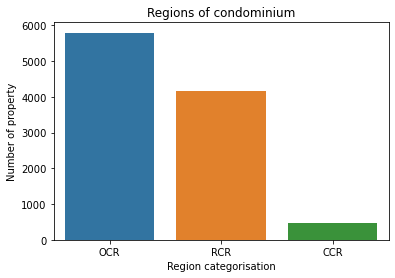

In [63]:
region = housing_condo_lease['market_segment'].value_counts()
#Core Central Region (CCR)
#Rest of Central Region (RCR)
#Outside Central Regon (OCR).

sns.barplot(region.index, region.values)
plt.title('Regions of condominium')
plt.ylabel('Number of property')
plt.xlabel('Region categorisation')

In [64]:
housing_condo_lease = housing_condo_lease.set_index('property_ID')

In [65]:
housing_condo_lease

,project_name,street_name,postal_district,market_segment,price,area_sqft,floor_level,price_per_sqft,date_of_sale,year_built
property_ID,,,,,,,,,,
1,THE LANDMARK,CHIN SWEE ROAD,03,RCR,2759888.0,1141.0,11 to 15,2419.0,Nov-2022,2020
2,THE LANDMARK,CHIN SWEE ROAD,03,RCR,1354888.0,517.0,21 to 25,2622.0,Nov-2022,2020
3,THE LANDMARK,CHIN SWEE ROAD,03,RCR,2778888.0,1141.0,16 to 20,2436.0,Nov-2022,2020
4,THE LANDMARK,CHIN SWEE ROAD,03,RCR,2888640.0,1141.0,16 to 20,2532.0,Nov-2022,2020
5,THE REEF AT KING'S DOCK,HARBOURFRONT AVENUE,04,RCR,2948000.0,1216.0,01 to 05,2424.0,Nov-2022,2021
...,...,...,...,...,...,...,...,...,...,...
10428,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,879000.0,667.0,16 to 20,1317.0,Nov-2017,2016
10429,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,652000.0,506.0,11 to 15,1289.0,Nov-2017,2016
10430,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,1535000.0,1281.0,06 to 10,1198.0,Nov-2017,2016


In [66]:
# change date of sale into datetime to plot sale prices over time
housing_condo_lease['date_of_sale'] = pd.to_datetime(housing_condo_lease['date_of_sale'])

In [67]:
housing_condo_lease['date_of_sale'] = housing_condo_lease['date_of_sale'].dt.strftime('%Y-%m')

In [68]:
housing_condo_lease['date_of_sale'].value_counts()

2018-03    514
2019-03    507
2018-09    459
2018-07    447
2018-01    400
          ... 
2022-03     31
2022-08     29
2022-04     27
2022-02     25
2022-11     23
Name: date_of_sale, Length: 61, dtype: int64

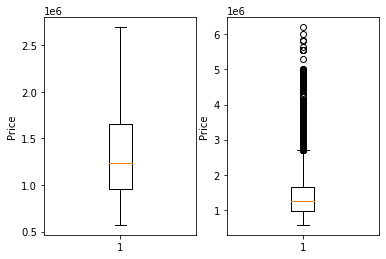

In [70]:
# check for outliers in price range of leasehold condos
plt.subplot(1,2,1) #row 1 col 2 index 1
plt.boxplot(housing_condo_lease['price'], showfliers=False)
plt.ylabel('Price')
plt.subplot(1,2,2) # row1 col2 index 2
plt.boxplot(housing_condo_lease['price'])
plt.ylabel('Price')
plt.show()

## 2. EDA

In [72]:
# include nearest mrt distance? 
# find popular areas from webscrape? 
#MRT station and/or bus routes, Expressways exits/entrances
#Schools, university, market, essential services
#Future developments within proximity of property can also affect the value of the property, e.g. new MRT, Shopping malls.

### 2a. Feature Engineering 

#### i. Creation of new column: floor class 

In [73]:
housing_condo_lease['floor_level'].value_counts()

01 to 05    3502
06 to 10    3035
11 to 15    2118
16 to 20     994
21 to 25     409
26 to 30     146
31 to 35     110
36 to 40      78
41 to 45      40
Name: floor_level, dtype: int64

In [74]:
def create_floor_class(x):
    if x == '01 to 05':
        floor_class = 1
    elif x == '06 to 10':
        floor_class = 2
    elif x == '11 to 15':
        floor_class = 3
    elif x == '16 to 20':
        floor_class = 4 
    elif x == '21 to 25':
        floor_class = 5 
    elif x == '26 to 30':
        floor_class = 6
    elif x == '31 to 35':
        floor_class = 7 
    elif x == '36 to 40':
        floor_class = 8 
    elif x == '41 to 45':
        floor_class = 9
    return floor_class

## the higher the floor, the more expensive it gets

In [75]:
# Create new column into df by using apply column. 
housing_condo_lease['floor_class'] = housing_condo_lease['floor_level'].apply(create_floor_class)

In [76]:
housing_condo_lease['price'].nunique()

4135

In [77]:
housing_condo_lease['floor_class'] = housing_condo_lease['floor_class'].astype(float)
housing_condo_lease['postal_district'] = housing_condo_lease['postal_district'].astype(float)

#### ii. New column: age 

In [78]:
# new column to find age of building
def create_age(x):
    result = 2022 - float(x)
    
    return result

housing_condo_lease['age'] = housing_condo_lease['year_built'].apply(create_age)

#### iii. New column: remaining tenure 

<AxesSubplot:>

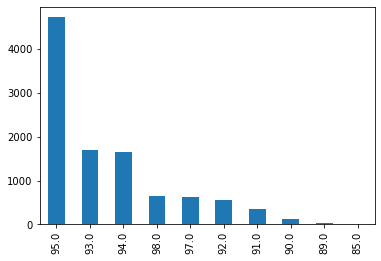

In [79]:
def create_remaining_tenure(x):
    remaining_tenure = 99 - float(x)
    
    return remaining_tenure

# create new col of leasehold remaining on tenure
housing_condo_lease['remaining_tenure'] = housing_condo_lease['age'].apply(create_remaining_tenure)

housing_condo_lease['remaining_tenure'].value_counts().plot(kind='bar')

In [80]:
# dataset is only representative of 17 districts
(housing_condo_lease['postal_district']).value_counts()

18.0    3146
13.0    1529
20.0    1206
28.0    1036
27.0     884
3.0      518
9.0      456
17.0     428
4.0      395
15.0     246
12.0     135
16.0     125
5.0      125
14.0     111
19.0      50
8.0       32
10.0      10
Name: postal_district, dtype: int64

### 2b.  Cleaning of outliers

In [81]:
housing_condo_lease.describe()

,postal_district,price,area_sqft,price_per_sqft,floor_class,age,remaining_tenure
count,10432.000000,1.043200e+04,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000
mean,17.140529,1.371800e+06,866.783646,1598.144651,2.355924,4.572565,94.427435
std,6.756981,6.025194e+05,327.015640,389.013085,1.445970,1.686738,1.686738
min,3.000000,5.720000e+05,420.000000,966.000000,1.000000,1.000000,85.000000
25%,13.000000,9.560000e+05,635.000000,1338.000000,1.000000,4.000000,93.000000
50%,18.000000,1.240000e+06,775.000000,1480.000000,2.000000,4.000000,95.000000
75%,20.000000,1.652000e+06,1033.000000,1724.000000,3.000000,6.000000,95.000000
max,28.000000,6.200000e+06,4768.000000,3830.000000,9.000000,14.000000,98.000000


In [82]:
# remove outliers seen in price 
for x in ['price']:
    q75, q25 = np.percentile(housing_condo_lease.loc[:,x],[75,25])
    IQR = q75-q25

    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)

    housing_condo_lease.loc[housing_condo_lease[x] < min, x] = np.nan
    housing_condo_lease.loc[housing_condo_lease[x] > max, x] = np.nan

In [83]:
dfwithoutliers = housing_condo_lease
dfwithoutliers

,project_name,street_name,postal_district,market_segment,price,area_sqft,floor_level,price_per_sqft,date_of_sale,year_built,floor_class,age,remaining_tenure
property_ID,,,,,,,,,,,,,
1,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,NaN,1141.0,11 to 15,2419.0,2022-11,2020,3.0,2.0,97.0
2,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1354888.0,517.0,21 to 25,2622.0,2022-11,2020,5.0,2.0,97.0
3,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,NaN,1141.0,16 to 20,2436.0,2022-11,2020,4.0,2.0,97.0
4,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,NaN,1141.0,16 to 20,2532.0,2022-11,2020,4.0,2.0,97.0
5,THE REEF AT KING'S DOCK,HARBOURFRONT AVENUE,4.0,RCR,NaN,1216.0,01 to 05,2424.0,2022-11,2021,1.0,1.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10428,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,879000.0,667.0,16 to 20,1317.0,2017-11,2016,4.0,6.0,93.0
10429,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,652000.0,506.0,11 to 15,1289.0,2017-11,2016,3.0,6.0,93.0
10430,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,1535000.0,1281.0,06 to 10,1198.0,2017-11,2016,2.0,6.0,93.0


In [84]:
housing_condo_lease[housing_condo_lease.isna().any(axis=1)]

,project_name,street_name,postal_district,market_segment,price,area_sqft,floor_level,price_per_sqft,date_of_sale,year_built,floor_class,age,remaining_tenure
property_ID,,,,,,,,,,,,,
1,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,NaN,1141.0,11 to 15,2419.0,2022-11,2020,3.0,2.0,97.0
3,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,NaN,1141.0,16 to 20,2436.0,2022-11,2020,4.0,2.0,97.0
4,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,NaN,1141.0,16 to 20,2532.0,2022-11,2020,4.0,2.0,97.0
5,THE REEF AT KING'S DOCK,HARBOURFRONT AVENUE,4.0,RCR,NaN,1216.0,01 to 05,2424.0,2022-11,2021,1.0,1.0,98.0
12,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,NaN,1141.0,16 to 20,2453.0,2022-10,2020,4.0,2.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7643,JADESCAPE,SHUNFU ROAD,20.0,RCR,NaN,2099.0,16 to 20,1559.0,2018-09,2018,4.0,4.0,95.0
7693,JADESCAPE,SHUNFU ROAD,20.0,RCR,NaN,2099.0,21 to 25,1588.0,2018-09,2018,5.0,4.0,95.0
7774,JADESCAPE,SHUNFU ROAD,20.0,RCR,NaN,2099.0,16 to 20,1550.0,2018-09,2018,4.0,4.0,95.0


In [85]:
# remove outliers in data
cleandf = housing_condo_lease.dropna(axis=0)

In [86]:
cleandf.describe()

,postal_district,price,area_sqft,price_per_sqft,floor_class,age,remaining_tenure
count,10040.000000,1.004000e+04,10040.000000,10040.000000,10040.000000,10040.000000,10040.000000
mean,17.317032,1.294172e+06,838.523008,1574.014343,2.328685,4.599801,94.400199
std,6.721473,4.459379e+05,283.549746,361.101887,1.418340,1.657674,1.657674
min,3.000000,5.720000e+05,420.000000,966.000000,1.000000,1.000000,85.000000
25%,13.000000,9.490000e+05,624.000000,1333.000000,1.000000,4.000000,93.000000
50%,18.000000,1.216300e+06,764.000000,1467.000000,2.000000,4.000000,95.000000
75%,20.000000,1.593000e+06,1023.000000,1708.000000,3.000000,6.000000,95.000000
max,28.000000,2.694000e+06,1991.000000,3327.000000,9.000000,14.000000,98.000000


array([[<AxesSubplot:title={'center':'postal_district'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area_sqft'}>],
       [<AxesSubplot:title={'center':'price_per_sqft'}>,
        <AxesSubplot:title={'center':'floor_class'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'remaining_tenure'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

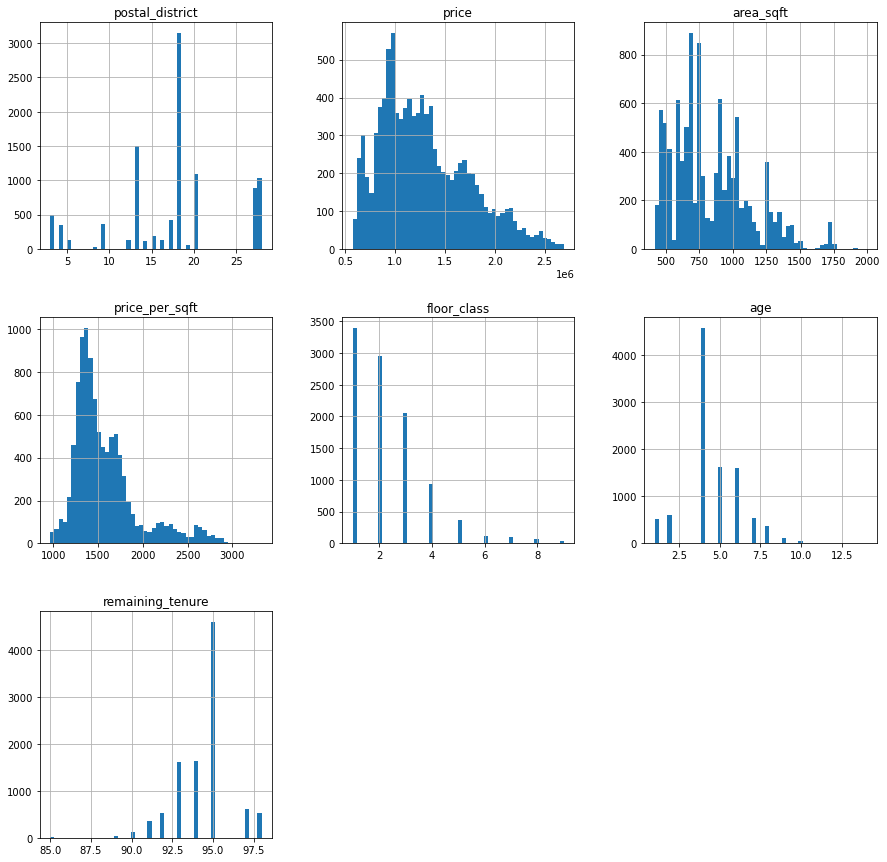

In [88]:
cleandf.hist(bins=50, figsize=(15, 15), orientation='vertical')

<AxesSubplot:>

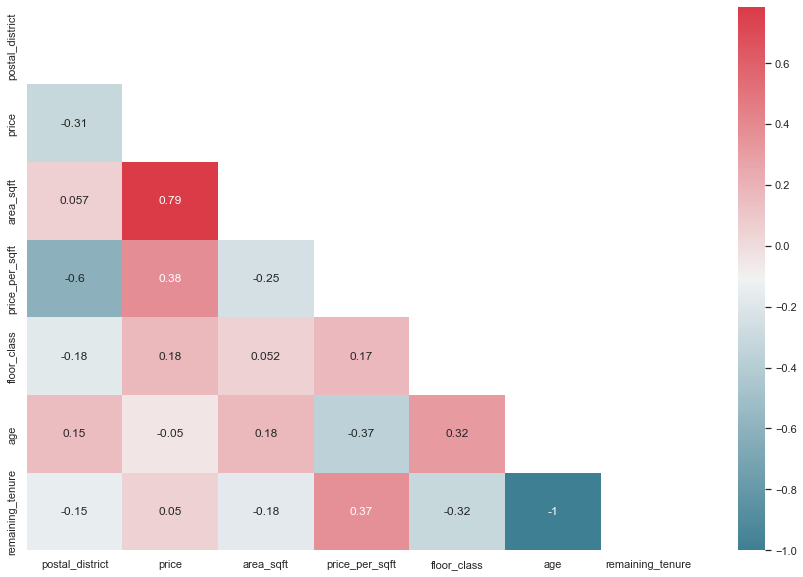

In [89]:
# creat heatmap
sns.set(style='white')

#set cmap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# mask upper half
mask = np.zeros_like(cleandf.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up matplotlib fig
f, ax = plt.subplots(figsize=(15,10))

# draw heatmap with mask and correct aspect ratio
sns.heatmap(cleandf.corr(), cmap=cmap, mask=mask, annot=True)

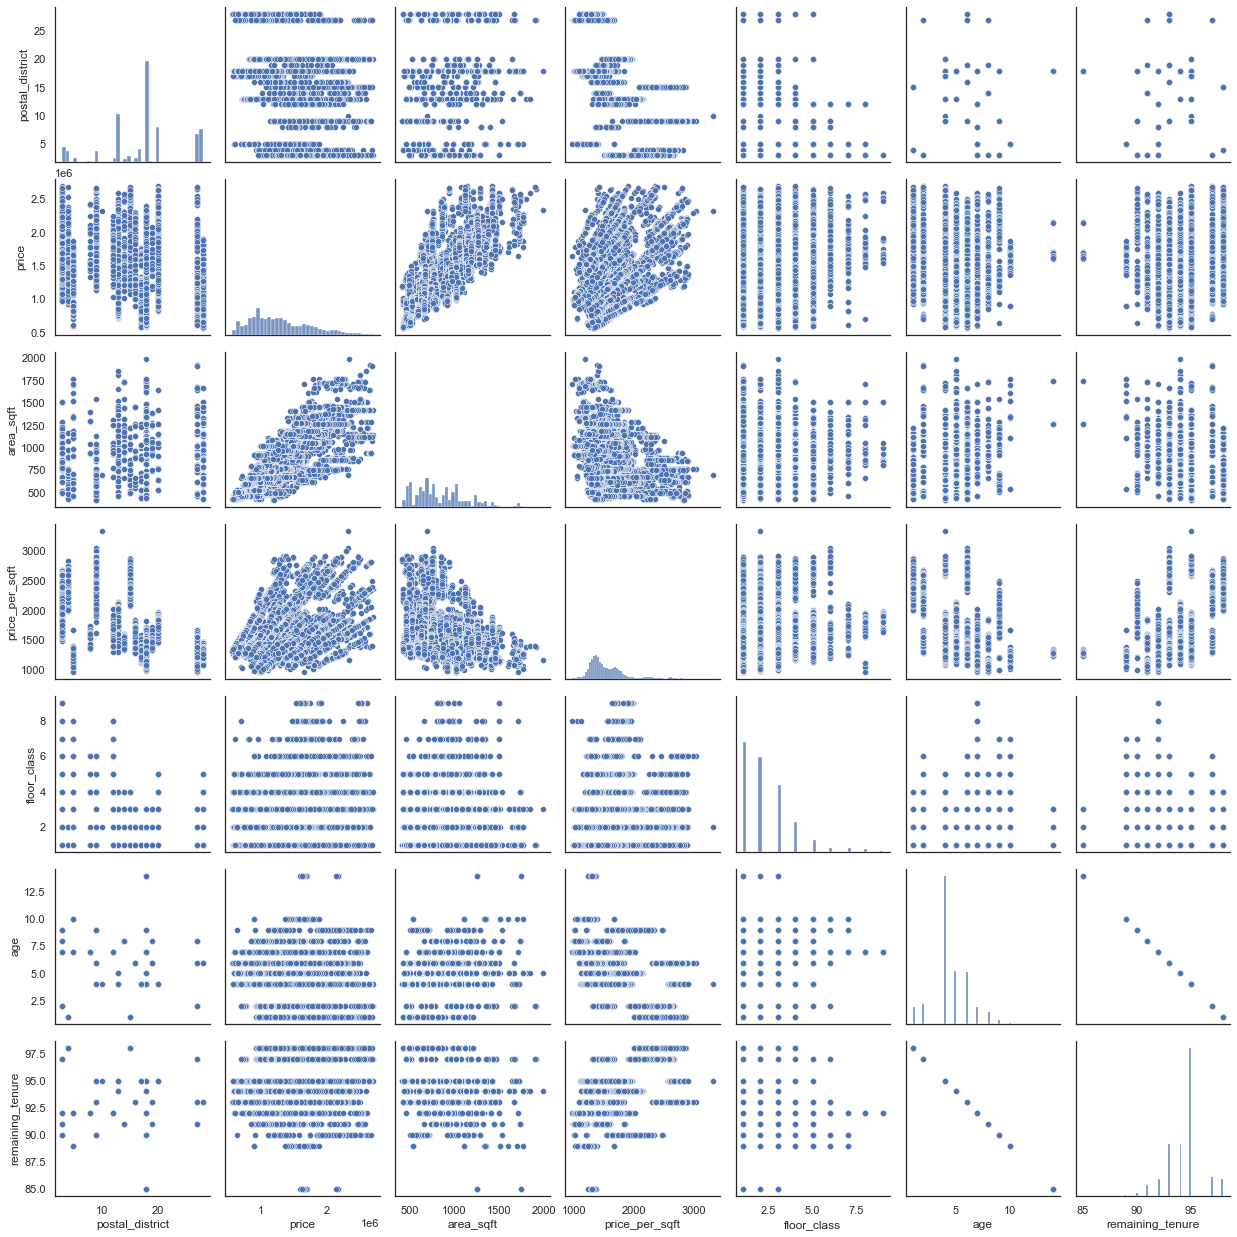

In [90]:
sns.pairplot(cleandf)

In [91]:
(cleandf['postal_district']).value_counts()

18.0    3145
13.0    1500
20.0    1087
28.0    1036
27.0     884
3.0      490
17.0     428
9.0      364
4.0      346
15.0     182
12.0     135
16.0     125
5.0      125
14.0     110
19.0      50
8.0       32
10.0       1
Name: postal_district, dtype: int64

In [92]:
cleandf.shape

(10040, 13)

In [93]:
cleandf.project_name.value_counts()

TREASURE AT TAMPINES        2203
JADESCAPE                   1087
PARC BOTANNIA               1036
THE TAPESTRY                 861
PARK COLONIAL                771
THE TRE VER                  729
THE JOVELL                   428
THE COMMODORE                408
THE REEF AT KING'S DOCK      346
SYMPHONY SUITES              244
KANDIS RESIDENCE             232
QUEENS PEAK                  218
THE LANDMARK                 204
LIV @ MB                     182
MARTIN MODERN                171
HAUS ON HANDY                144
GEM RESIDENCES               135
GRANDEUR PARK RESIDENCES     125
SIMS URBAN OASIS              88
PARC RIVIERA                  82
THE ALPS RESIDENCES           68
HIGHLINE RESIDENCES           62
SOPHIA HILLS                  49
FOREST WOODS                  49
THE TRILINQ                   43
STURDEE RESIDENCES            32
TRE RESIDENCES                22
COCO PALMS                     9
PRINCIPAL GARDEN               6
THE SANTORINI                  4
CUSCADEN R

In [95]:
cleandf['market_segment'].value_counts(normalize=True)

OCR    0.576992
RCR    0.386653
CCR    0.036355
Name: market_segment, dtype: float64

C:\Users\katel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Region categorisation')

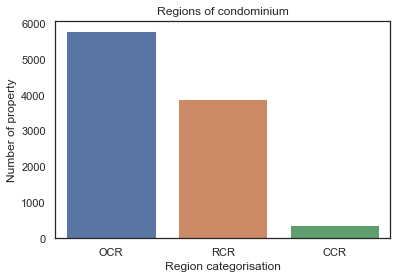

In [96]:
region = cleandf['market_segment'].value_counts()
#Core Central Region (CCR)
#Rest of Central Region (RCR)
#Outside Central Regon (OCR).

sns.barplot(region.index, region.values)
plt.title('Regions of condominium')
plt.ylabel('Number of property')
plt.xlabel('Region categorisation')

In [97]:
cleandf

,project_name,street_name,postal_district,market_segment,price,area_sqft,floor_level,price_per_sqft,date_of_sale,year_built,floor_class,age,remaining_tenure
property_ID,,,,,,,,,,,,,
2,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1354888.0,517.0,21 to 25,2622.0,2022-11,2020,5.0,2.0,97.0
6,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1334888.0,517.0,16 to 20,2584.0,2022-11,2020,4.0,2.0,97.0
7,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1839888.0,764.0,16 to 20,2407.0,2022-11,2020,4.0,2.0,97.0
8,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1825888.0,764.0,16 to 20,2389.0,2022-11,2020,4.0,2.0,97.0
9,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1320960.0,495.0,26 to 30,2668.0,2022-11,2020,6.0,2.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10428,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,879000.0,667.0,16 to 20,1317.0,2017-11,2016,4.0,6.0,93.0
10429,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,652000.0,506.0,11 to 15,1289.0,2017-11,2016,3.0,6.0,93.0
10430,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,1535000.0,1281.0,06 to 10,1198.0,2017-11,2016,2.0,6.0,93.0


Text(0, 0.5, 'Price')

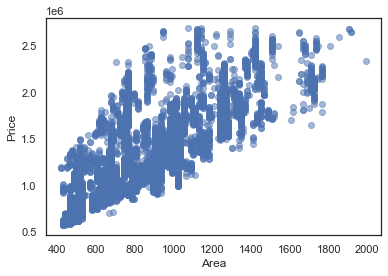

In [98]:
plt.scatter(x='area_sqft', y='price', data=cleandf, alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Price')

## 2c. Feature scaling

In [133]:
cleandf

,project_name,street_name,postal_district,market_segment,price,area_sqft,floor_level,price_per_sqft,date_of_sale,year_built,floor_class,age,remaining_tenure
property_ID,,,,,,,,,,,,,
2,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1354888.0,517.0,21 to 25,2622.0,2022-11,2020,5.0,2.0,97.0
6,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1334888.0,517.0,16 to 20,2584.0,2022-11,2020,4.0,2.0,97.0
7,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1839888.0,764.0,16 to 20,2407.0,2022-11,2020,4.0,2.0,97.0
8,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1825888.0,764.0,16 to 20,2389.0,2022-11,2020,4.0,2.0,97.0
9,THE LANDMARK,CHIN SWEE ROAD,3.0,RCR,1320960.0,495.0,26 to 30,2668.0,2022-11,2020,6.0,2.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10428,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,879000.0,667.0,16 to 20,1317.0,2017-11,2016,4.0,6.0,93.0
10429,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,652000.0,506.0,11 to 15,1289.0,2017-11,2016,3.0,6.0,93.0
10430,PARC BOTANNIA,FERNVALE STREET,28.0,OCR,1535000.0,1281.0,06 to 10,1198.0,2017-11,2016,2.0,6.0,93.0


In [134]:
ys = cleandf.price
Xs = cleandf[[ 'market_segment','price', 'area_sqft', 'floor_class', 'age', 'remaining_tenure']]

In [135]:
Xs = pd.get_dummies(Xs, columns=['market_segment'])

In [136]:
# trial get dummies with market segment and remove postal distrcit as data does not make sense after scaling
data= Xs
data 

,price,area_sqft,floor_class,age,remaining_tenure,market_segment_CCR,market_segment_OCR,market_segment_RCR
property_ID,,,,,,,,
2,1354888.0,517.0,5.0,2.0,97.0,0,0,1
6,1334888.0,517.0,4.0,2.0,97.0,0,0,1
7,1839888.0,764.0,4.0,2.0,97.0,0,0,1
8,1825888.0,764.0,4.0,2.0,97.0,0,0,1
9,1320960.0,495.0,6.0,2.0,97.0,0,0,1
...,...,...,...,...,...,...,...,...
10428,879000.0,667.0,4.0,6.0,93.0,0,1,0
10429,652000.0,506.0,3.0,6.0,93.0,0,1,0
10430,1535000.0,1281.0,2.0,6.0,93.0,0,1,0


label encoder reduces linear regression of accuracy score to 88% from 90%
le = LabelEncoder()
Xs['market_segment'] = le.fit_transform(Xs['market_segment'])
Xs['project_name'] = le.fit_transform(Xs['project_name'])

In [137]:
data.columns

Index(['price', 'area_sqft', 'floor_class', 'age', 'remaining_tenure',
       'market_segment_CCR', 'market_segment_OCR', 'market_segment_RCR'],
      dtype='object')

In [138]:
# normalise as not normally distributed data
scaler = MinMaxScaler()

In [139]:
data = scaler.fit_transform(data)

In [140]:
scaleddf = pd.DataFrame(data, columns=['price', 'area_sqft', 'floor_class', 'age',
       'remaining_tenure', 'market_segment_CCR', 'market_segment_OCR',
       'market_segment_RCR'])
scaleddf

,price,area_sqft,floor_class,age,remaining_tenure,market_segment_CCR,market_segment_OCR,market_segment_RCR
0,0.368939,0.061744,0.500,0.076923,0.923077,0.0,0.0,1.0
1,0.359514,0.061744,0.375,0.076923,0.923077,0.0,0.0,1.0
2,0.597497,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
3,0.590899,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
4,0.352950,0.047740,0.625,0.076923,0.923077,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
10035,0.144675,0.157225,0.375,0.384615,0.615385,0.0,1.0,0.0
10036,0.037700,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0
10037,0.453817,0.548059,0.125,0.384615,0.615385,0.0,1.0,0.0
10038,0.039114,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0


In [141]:
y = scaleddf.price
X = scaleddf.loc[:, scaleddf.columns != 'price']
X

,area_sqft,floor_class,age,remaining_tenure,market_segment_CCR,market_segment_OCR,market_segment_RCR
0,0.061744,0.500,0.076923,0.923077,0.0,0.0,1.0
1,0.061744,0.375,0.076923,0.923077,0.0,0.0,1.0
2,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
3,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
4,0.047740,0.625,0.076923,0.923077,0.0,0.0,1.0
...,...,...,...,...,...,...,...
10035,0.157225,0.375,0.384615,0.615385,0.0,1.0,0.0
10036,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0
10037,0.548059,0.125,0.384615,0.615385,0.0,1.0,0.0
10038,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0


## 3. Linear Regression

#### Base model of Linear Regression 

In [142]:
# define target variable and predictor variables
ys = scaleddf.price
Xs = scaleddf.loc[:, scaleddf.columns != 'price']
Xs

,area_sqft,floor_class,age,remaining_tenure,market_segment_CCR,market_segment_OCR,market_segment_RCR
0,0.061744,0.500,0.076923,0.923077,0.0,0.0,1.0
1,0.061744,0.375,0.076923,0.923077,0.0,0.0,1.0
2,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
3,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
4,0.047740,0.625,0.076923,0.923077,0.0,0.0,1.0
...,...,...,...,...,...,...,...
10035,0.157225,0.375,0.384615,0.615385,0.0,1.0,0.0
10036,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0
10037,0.548059,0.125,0.384615,0.615385,0.0,1.0,0.0
10038,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0


In [143]:
# create training and test split subsets
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

In [144]:
# initialise lr model
linreg = LinearRegression()
# fit model
linreg.fit(X_train, y_train)

LinearRegression()

In [145]:
# test model score
print('train score = ', linreg.score(X_train, y_train))
print('test score = ', linreg.score(X_test, y_test))
#check coefficient
print('linreg coef = ', linreg.coef_)

train score =  0.9078578394943508
test score =  0.906698458953412
linreg coef =  [ 1.02023820e+00  1.42159861e-01 -3.71356686e+13 -3.71356686e+13
  3.39326951e+12  3.39326951e+12  3.39326951e+12]


In [146]:
## forward feature selection to find relevant features
## Flag intermediate output
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

## Use Forward Feature Selection to pick a good model
# start with no predictors (intialise empty array called included)
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0} # dictionary
# create a model object to hold the modelling parameters
linreg = LinearRegression() # intialise model for Linear Regression
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(Xs.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data 
        fit = linreg.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression) 
        r2 = linreg.score(X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model 
        k = len(included) + 1
        # calculate the adjusted R^2 
        adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1)) 

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = market_segment_CCR, area_sqft, floor_class, market_segment_OCR, remaining_tenure, age, market_segment_RCR
(Step) Trying market_segment_CCR...
(Step) - Features = market_segment_CCR
(Step) - Adjusted R^2: This = 0.054; Best = 0.000
(Step) - New Best!   : Feature = market_segment_CCR; R^2 = 0.054; Adjusted R^2 = 0.054
(Step) Trying area_sqft...
(Step) - Features = area_sqft
(Step) - Adjusted R^2: This = 0.615; Best = 0.054
(Step) - New Best!   : Feature = area_sqft; R^2 = 0.615; Adjusted R^2 = 0.615
(Step) Trying floor_class...
(Step) - Features = floor_class
(Step) - Adjusted R^2: This = 0.028; Best = 0.615
(Step) Trying market_segment_OCR...
(Step) - Features = market_segment_OCR
(Step) - Adjusted R^2: This = 0.145; Best = 0.615
(Step) Trying remaining_tenure...
(Step) - Features = remaining_tenure
(Step) - Adjusted R^2: This = 0.003; Best = 0.615
(Step) Trying age...
(Step) - Features = age
(Step) - Adjusted R^2: This = 0.003; Best = 0.615
(Step) Trying market_segme

In [147]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

In [148]:
X_train

,area_sqft,floor_class,age,remaining_tenure,market_segment_CCR,market_segment_OCR,market_segment_RCR
9817,0.007002,0.500,0.384615,0.615385,0.0,1.0,0.0
5573,0.390197,0.000,0.230769,0.769231,0.0,1.0,0.0
1392,0.444940,0.250,0.000000,1.000000,0.0,0.0,1.0
1921,0.205602,0.125,0.230769,0.769231,0.0,0.0,1.0
2864,0.164227,0.000,0.307692,0.692308,0.0,0.0,1.0
...,...,...,...,...,...,...,...
5734,0.164227,0.000,0.230769,0.769231,0.0,1.0,0.0
5191,0.322088,0.125,0.307692,0.692308,0.0,1.0,0.0
5390,0.451941,0.000,0.307692,0.692308,0.0,1.0,0.0
860,0.486314,0.250,0.461538,0.538462,0.0,1.0,0.0


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'remaining_tenure'),
  Text(1, 0, 'market_segment_OCR'),
  Text(2, 0, 'floor_class'),
  Text(3, 0, 'market_segment_RCR'),
  Text(4, 0, 'age'),
  Text(5, 0, 'area_sqft'),
  Text(6, 0, 'market_segment_CCR')])

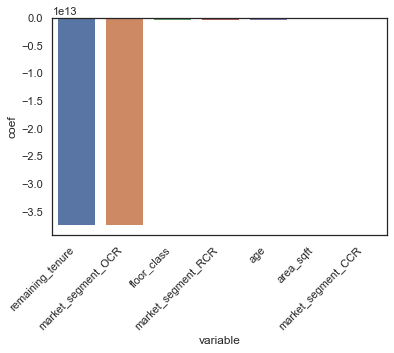

In [149]:
# Plot Coefficients with selected FFS 
view_coeff(X_train, linreg)
plt.xticks(rotation=45, ha='right')
## trying to limit coefficients by using lasso and ridge

In [150]:
# from FFS, best score is achieved with 'age', 'area_sqft', 'market_segment_OCR', 'market_segment_RCR'
## ?? 'remaining_tenure', 'floor_class'

In [151]:
#fit model with new params selected by FFS
X1 = Xs[['age', 'area_sqft', 'market_segment_OCR', 'market_segment_RCR']]
# train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, ys, test_size=0.2, random_state=42)
# fit model
linreg.fit(X1_train, y1_train)
# test model
print('train score = ', linreg.score(X1_train, y1_train))
print('test score = ', linreg.score(X1_test, y1_test))

train score =  0.8970502004250775
test score =  0.8953307675835925


####  Evaluate performance matrix

In [152]:
# predict price from X_test and find error 
y_preds = linreg.predict(X1_test)
y_preds

array([0.38593195, 0.2955729 , 0.03333986, ..., 0.30977218, 0.38593195,
       0.38593195])

Text(0.5, 1.0, 'Y test against predicted results in linear regression')

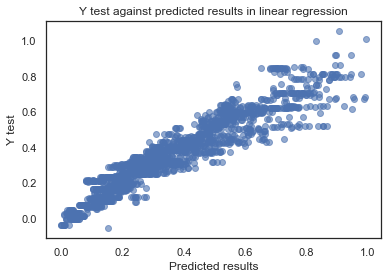

In [153]:
plt.scatter(y1_test,y_preds, alpha=0.6)
plt.xlabel("Predicted results")
plt.ylabel("Y test")
plt.title('Y test against predicted results in linear regression')

mape = mean_absolute_percentage_error(y_test, y_preds)
print('Mean absolute percentage error =', round((mape),4))  #9% error, low is good


In [154]:
mse = mean_squared_error(y_test, y_preds)
print('Mean squared error =', round((mse),4))

rmse = mse**0.5
print('Root mean squared error =', round((rmse),4)) # lower is good at 200,000 for 1 mil properties

mae = median_absolute_error(y_test, y_preds)
print('Median absolute error =', round((mae), 4))

R2_score = r2_score(y_test, y_preds)
print('R2_score = ', round((R2_score),4)) # r2 score close to 1 is good

adjusted_R2_score = 1 - (1-r2_score(y_test, y_preds)) * (len(ys)-1)/(len(ys)-Xs.shape[1]-1)
print('adjusted_R2_score', round((adjusted_R2_score), 4))

Mean squared error = 0.0049
Root mean squared error = 0.0701
Median absolute error = 0.0366
R2_score =  0.8953
adjusted_R2_score 0.8953


####  Lasso regularisation CV model (set coefficients to zero)

In [155]:
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [156]:
# trial with ALL features fitted and try lasso model
X2 = Xs
# train test split
X_train, X_test, y_train, y_test = train_test_split(X2, ys, test_size=0.2, random_state=42)
# fit all features into linreg
linreg.fit(X_train, y_train)

LinearRegression()

In [157]:
ys

0        0.368939
1        0.359514
2        0.597497
3        0.590899
4        0.352950
           ...   
10035    0.144675
10036    0.037700
10037    0.453817
10038    0.039114
10039    0.132422
Name: price, Length: 10040, dtype: float64

In [158]:
# variables defined from above and need to be same as linreg
# create a model object to hold the modelling parameters
lasso_model = Lasso(max_iter=5000) # same as intialising linear regression model 
    
# keep track of the intermediate results for coefficients and errors with empty lists
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200) # setting a series of numbers between -6 and 6

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(X_train, y_train)
    coefs.append(lasso_model.coef_)
    errors.append(mean_squared_error(lasso_model.coef_, linreg.coef_))
    
## if train data is high accuracy and test data is lower accuracy , likelyhood of overfitting

In [159]:
print(errors)

[3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145162e+26, 3.989512278145163e+26, 3.989512278145163e+26, 3.989512278145163e+26, 3.989512278145163e+26, 3.989512278145163e+26, 3.989512278145163e+26, 3.989512278145163e+26, 3.9895122781451645e+26, 3.9895122781451645e+26, 3.9895122781451645e+26, 3.9895122781451645e+26, 3.9895

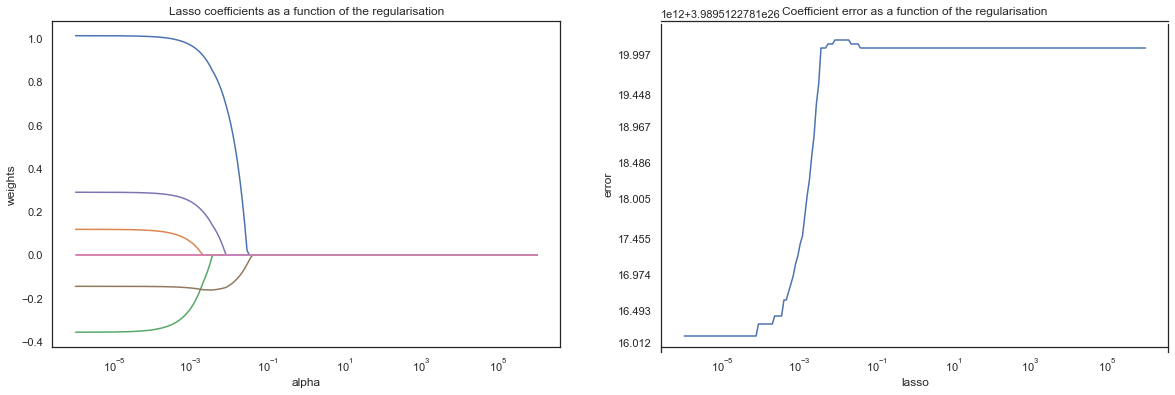

In [160]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('lasso')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [161]:
# Find Optimal Lasso using cross validation same value for 5/10 cv)
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10, max_iter=5000)
optimal_lasso.fit(X_train, y_train)
lasso_optimal_alpha = optimal_lasso.alpha_
print('Alpha:', lasso_optimal_alpha)
print('Train score:', optimal_lasso.score(X_train, y_train))
print('Test score:', optimal_lasso.score(X_test, y_test))

Alpha: 1e-06
Train score: 0.9051854652459415
Test score: 0.9038823244378482


In [162]:
# no coefficient plots as all are zero in lasso

#### Evaluate performance matrix 

In [163]:
lasso_optimal_alpha

1e-06

In [164]:
# eval ridge regression model 
lasso_model = Lasso(alpha=lasso_optimal_alpha)
lasso_model.fit(X_train, y_train)
y_preds = lasso_model.predict(X_test)

C:\Users\katel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.566e+00, tolerance: 3.489e-02
  model = cd_fast.enet_coordinate_descent(


In [165]:
mse = mean_squared_error(y_test, y_preds)
print('Mean squared error =', round((mse),4))

rmse = mse**0.5
print('Root mean squared error =', round((rmse),4)) # lower is good at 200,000 for 1 mil properties

mae = median_absolute_error(y_test, y_preds)
print('Median absolute error =', round((mae), 4))

R2_score = r2_score(y_test, y_preds)
print('R2_score = ', round((R2_score),4)) # r2 score close to 1 is good

adjusted_R2_score = 1 - (1-r2_score(y_test, y_preds)) * (len(ys)-1)/(len(ys)-Xs.shape[1]-1)
print('adjusted_R2_score', round((adjusted_R2_score), 4))

Mean squared error = 0.0045
Root mean squared error = 0.0672
Median absolute error = 0.034
R2_score =  0.9039
adjusted_R2_score 0.9038


#### Ridge regularisation CV model  

In [166]:
X2

,area_sqft,floor_class,age,remaining_tenure,market_segment_CCR,market_segment_OCR,market_segment_RCR
0,0.061744,0.500,0.076923,0.923077,0.0,0.0,1.0
1,0.061744,0.375,0.076923,0.923077,0.0,0.0,1.0
2,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
3,0.218969,0.375,0.076923,0.923077,0.0,0.0,1.0
4,0.047740,0.625,0.076923,0.923077,0.0,0.0,1.0
...,...,...,...,...,...,...,...
10035,0.157225,0.375,0.384615,0.615385,0.0,1.0,0.0
10036,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0
10037,0.548059,0.125,0.384615,0.615385,0.0,1.0,0.0
10038,0.054742,0.250,0.384615,0.615385,0.0,1.0,0.0


In [167]:
X2 = Xs
# train test split
X_train, X_test, y_train, y_test = train_test_split(X2, ys, test_size=0.2, random_state=42)
# fit model
linreg.fit(X_train, y_train)

LinearRegression()

In [168]:
X_train

,area_sqft,floor_class,age,remaining_tenure,market_segment_CCR,market_segment_OCR,market_segment_RCR
9817,0.007002,0.500,0.384615,0.615385,0.0,1.0,0.0
5573,0.390197,0.000,0.230769,0.769231,0.0,1.0,0.0
1392,0.444940,0.250,0.000000,1.000000,0.0,0.0,1.0
1921,0.205602,0.125,0.230769,0.769231,0.0,0.0,1.0
2864,0.164227,0.000,0.307692,0.692308,0.0,0.0,1.0
...,...,...,...,...,...,...,...
5734,0.164227,0.000,0.230769,0.769231,0.0,1.0,0.0
5191,0.322088,0.125,0.307692,0.692308,0.0,1.0,0.0
5390,0.451941,0.000,0.307692,0.692308,0.0,1.0,0.0
860,0.486314,0.250,0.461538,0.538462,0.0,1.0,0.0


In [169]:
# create a model object to hold the modelling parameters
ridge_model = Ridge() # same as intialising linear regression model 
    
# keep track of the intermediate results for coefficients and errors with empty lists
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) # setting a series of numbers between -6 and 6

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridge_model.set_params(alpha = a)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)
    errors.append(mean_squared_error(ridge_model.coef_, linreg.coef_))
    
## if train data is high accuracy and test data is lower accuracy , likelyhood of overfitting

In [170]:
ridge_model.coef_

array([ 2.35563762e-04,  4.95560726e-05, -1.22982850e-05,  1.22982850e-05,
        7.27209293e-05, -3.14319266e-04,  2.41598337e-04])

In [171]:
print(errors)

[3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452016e+26, 3.9895122781452

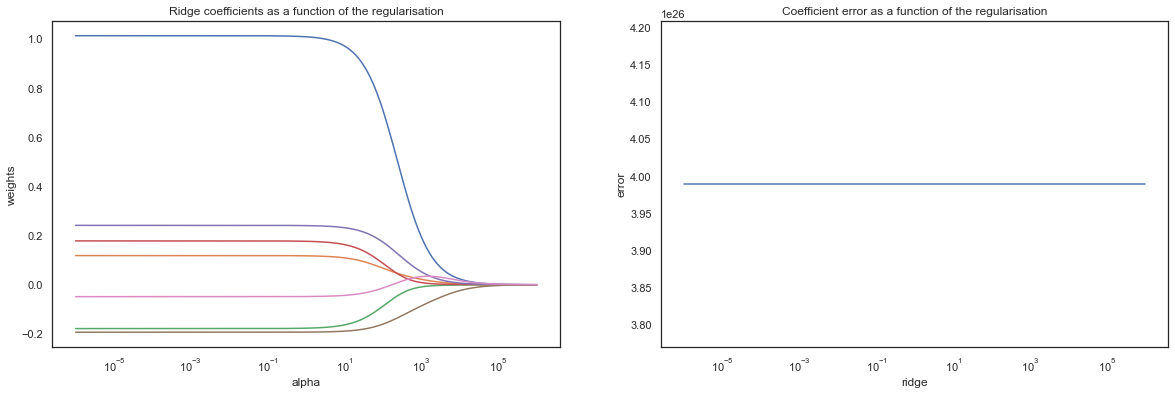

In [172]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('ridge')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Text(0.5, 1.0, 'Ridge coefficients')

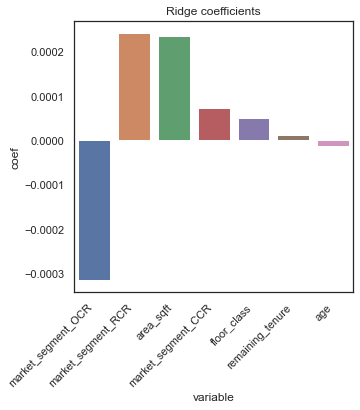

In [173]:
plt.figure(figsize = (5, 5))
view_coeff(X_train, ridge_model)
plt.xticks(rotation=45, ha='right')
plt.title('Ridge coefficients')

In [174]:
# Find Optimal alpha/ lambda Using cross validation
# alpha value is very similar, so use cv = 10
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=cv)
optimal_ridge.fit(X_train, y_train)
ridge_optimal_alpha = optimal_ridge.alpha_
print('Alpha:', ridge_optimal_alpha)
print('Train score:', optimal_ridge.score(X_train, y_train))
print('Test score:', optimal_ridge.score(X_test, y_test))

Alpha: 0.06669919663030115
Train score: 0.9051854006113009
Test score: 0.9038818312037877


In [175]:
ridge_optimal_alpha

0.06669919663030115

In [176]:
# eval ridge regression model 
ridge_model = Ridge(alpha=ridge_optimal_alpha)
ridge_model.fit(X_train, y_train)
y_preds = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
print('Mean squared error =', round((mse),4))

rmse = mse**0.5
print('Root mean squared error =', round((rmse),4)) # lower is good at 200,000 for 1 mil properties

mae = median_absolute_error(y_test, y_preds)
print('Median absolute error =', round((mae), 4))

R2_score = r2_score(y_test, y_preds)
print('R2_score = ', round((R2_score),4)) # r2 score close to 1 is good

adjusted_R2_score = 1 - (1-r2_score(y_test, y_preds)) * (len(ys)-1)/(len(ys)-Xs.shape[1]-1)
print('adjusted_R2_score', round((adjusted_R2_score), 4))

Mean squared error = 0.0045
Root mean squared error = 0.0672
Median absolute error = 0.034
R2_score =  0.9039
adjusted_R2_score 0.9038
